In [31]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0, n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=40)

In [32]:
import matplotlib.pyplot as plt

In [33]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

<IPython.core.display.Javascript object>

In [34]:
def perceptron(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]
        

In [35]:
def step(z):
    return 1 if z>0 else 0

In [36]:
intercept_,coef_ = perceptron(X,y)

In [37]:
print(coef_)
print(intercept_)

[1.09140105 0.70190757]
1.1


In [38]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [39]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

In [40]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

<IPython.core.display.Javascript object>

(-3.0, 2.0)

In [41]:
def perceptron(X,y):
    
    m = []
    b = []
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(200):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0]/weights[2]))
        
    return m,b

In [42]:
m,b = perceptron(X,y)

In [43]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

In [44]:
fig, ax = plt.subplots(figsize=(9,5))

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*m[0] +b[0]
ax.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
line, = ax.plot(x_i, x_i*m[0] +b[0] , 'r-', linewidth=2)
plt.ylim(-3,3)
def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*m[i] + b[i])
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, repeat=True, frames=200, interval=100)

<IPython.core.display.Javascript object>

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\animation.py:892: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [45]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X,y)

LogisticRegression()

In [46]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])

In [47]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b

In [48]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

<IPython.core.display.Javascript object>

(-3.0, 2.0)

> You have notice that our logic and scikit learn logic has difference, so which is better???

`X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0, n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)`
### when you increase the value of ` class_sep=10 ` to `class_sep=100` you have clearly notice that logistic regression class performs well??

## ***BECAUSE WE ARE USING `PERCEPTON TRICK` and CLASS USING `LOGISTIC REGRESSION`***

In [49]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def perceptron(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = sigmoid(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]

In [50]:
intercept, coeff = perceptron(X, y)

In [51]:
m = -(coeff[0]/coeff[1])
b = -(intercept/coeff[1])

In [52]:
x_input2 = np.linspace(-3, 3, 100)
y_input2 = m*x_input + b

In [55]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3, label='step fn')
plt.plot(x_input1,y_input1,color='black',linewidth=3, label='logistic reg')
plt.plot(x_input2,y_input2,color='brown',linewidth=3, label='sigmoid fn')
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)
plt.legend()
plt.savefig('new_trick.png')

<IPython.core.display.Javascript object>

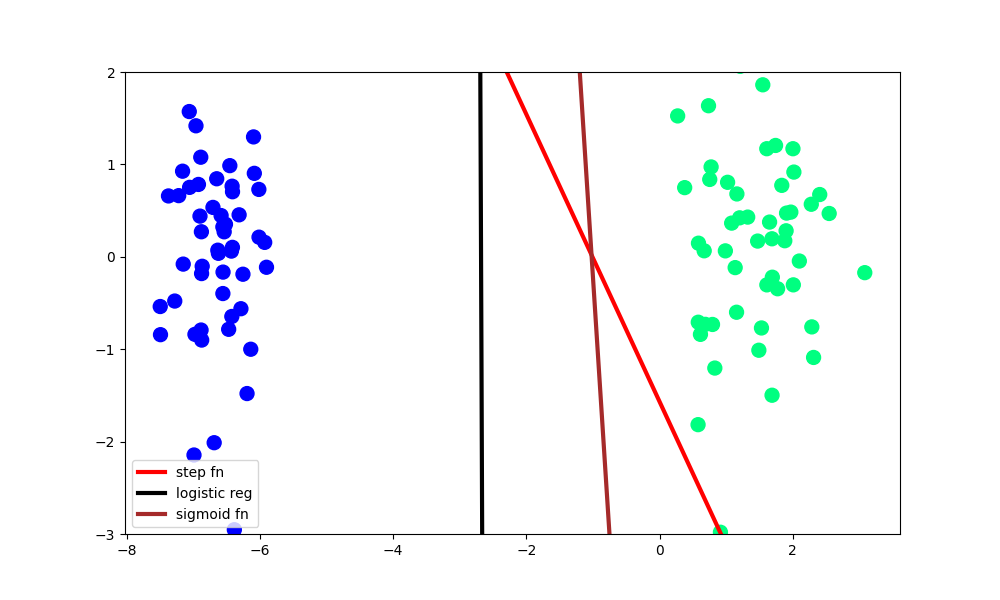
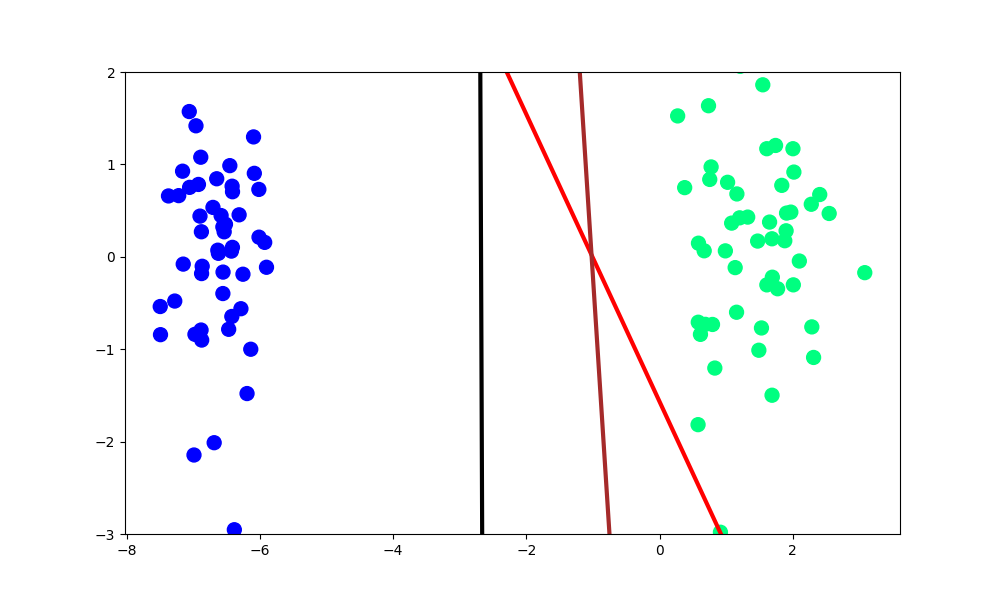

## Still we have far away from actual solution?? why!

> Since we are using loop with epochs 1000 times, but it is not gurantee, that it pick every time different point and what if there is >1000 points?? so in this technique we are not included every point, the solution is not fair, so what is the **SOLUTION?**

#### ***So we need to use a loss function like other machine learning algorithm*** 